<center>
    <h1>
        Problemas de mapas
    </h1>
    <h2>
         Análise de algoritmos de busca
    </h2>
    </center>

<h4>
    <center>
        Universidade Federal de Juiz de Fora
        <br/> Departamento de Ciência da Computação
        <br/> DCC014 - Inteligência Artificial, 2020.1
    </center>
</h4>

<h4>
    <ul>
        <li>Wagno Leão Sergio - 201865555C</li>
        <li>Davi Magalhães Pereira - 201865558C</li>
    </ul>
</h4>

#### Professor: Saulo Moraes Villela

## Definição do problema

<font size=3>O problema de mapa consiste em encontrar o menor caminho entre dois pontos de um mapa que é representado por um grafo. Levando em consideração que as rotas que ligam um ponto ao outro possuem custos associados que influenciarão nas escolhas dos algoritmos informados.</font>

## Implementação

<font size=3>
    <ul>
        <li>O código-fonte do proejeto foi escrito em python 3;</li>
        <br>
        <li>Foi criado um gerador de instâncias (mapas) para realizar os experimentos, o mesmo retorna uma lista de tuplas contendo os ID’s dos pontos conectados e o custo da rota, como por exemplo (“A”, “B”, 25.43). Durante a implementação tomou-se o cuidado de tentar gerar mapas consistentes e coerentes, como por exemplo a priorização de conexão entre pontos mais próximos além de especificar a quantidade máxima de vizinhos que cada nó pode ter. Foi adicionado também um ruído ao custo das arestas para garantir a consistência da heurística selecionada;
        </li>
        <img src="./graph_n25.png"/>
        <br>
        <li>
            Foi implementada uma classe <code>Graph()</code> baseada em lista de adjacência onde a expressão <code>Graph[node]</code> retorna uma lista dos vizinhos de ‘node’ e a expressão <code>Graph[node1][node2]</code> retorna peso associado a aresta ‘node1’/‘node2’. A classe tem como principal atributo um dicionário, onde os campos são acessados por <code>NamedTuples</code> que fazem a representação de pontos no mapa. As arestas também são representadas por <code>NamedTuples</code>;
        </li>
        <br>
        <li>
            A classe Graph possui métodos para inserção de nós, inserção de arestas e de impressão do grafo no terminal, além de métodos adicionais para operações com a classe.
        </li>
        <br>
        <li>
            Todo o projeto está hospedado em um repositório do GitHub.
        </li>
    </ul>
</font>

<font size=3>Além disso foram criadas funções utilitárias para cálculo de heurística, formatação, registro das métricas executadas e criação de gráficos dos mapas gerados. A distância euclidiana entre os pontos foi escolhida como heurística.<br>Foram utilizadas como métricas: </font>

* Custo e profundidade da solução;
* Número de nós expandidos e visitados;
* Valor médio do fator de ramificação da árvore;
* Tempo de execução do algoritmo.


## Divisão de tarefas

<font size=3>Os dois participantes implementaram a estrutura principal do grafo e as funções utilitárias. Em relação aos algoritmos de busca a divisão de tarefas foi a seguinte:</font>

### Davi

* Busca em largura (BFS)
* Busca em profundidade (DFS)
* Guloso (Greddy)
* A*

### Wagno

* Backtracking
* Busca Ordenada (UCS)
* IDA*

## Execuções
<font size=3>
    <p>
        Executamos os algoritmos implementados para mapas gerados com 25, 50, 100 e 200 nós. O número de arestas foi regulado de acordo com o tamanho do mapa. Tomou-se o cuidado de sempre selecionar o par de nós mais distantes entre si do mapa. Cada algoritmo é executado 10 vezes para cada tamanho de mapa, gerando instâncias diferentes.
    </p>
    <p>
        O computador utilizado nos experimentos possui um processador Ryzen 5 2400G de 3.9Ghz e com 8GB de memória RAM.
    </p>
</font>

## Tabela de dados

<font size=3> 
    Para a geração dos dados foi levado em consideração apenas as execuções em que houve sucesso na busca da solução. A tabela gerada possui todas as variáveis mencionadas anteriormente e cada linha representa uma execução.
<font/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
output_df = pd.read_csv("../trabalhoIA/outputs/results.csv")
output_df.head()

,algorithm,solution,depth,cost,expanded_nodes,visited_nodes,average_branching_factor,execution_time,result,n
0,Backtracking,'EastAllison'->'Ellismouth'->'EastHenryton'->...,11,411.626,21,22,3.190476,0.000250,success,25
1,BFS,'EastAllison'->'Ellismouth'->'Ricardoview'->'...,4,186.864,19,25,1.263158,0.000108,success,25
2,DFS,'EastAllison'->'LakeKevin'->'Stewartport'->'L...,8,370.931,14,14,2.428571,0.000096,success,25
3,UCS,'EastAllison'->'Ellismouth'->'SouthAmber'->'R...,5,186.636,107,24,4.458333,0.001263,success,25
4,Greedy,'EastAllison'->'Stewartport'->'Leemouth'->'Gr...,12,400.513,12,13,3.083333,0.000258,success,25


<font size=3>
    <p>
    A tabela abaixo foi criada agrupando as execuções por algoritmo e calculando a média. Observando-a é perceptível que a média do tempo de execução do algoritmo IDA* é de 10 a 20 vezes maior que em relação aos outros algoritmos. Além disso a média de nós expandidos do IDA* distorce completamente a métrica, sendo  em média 46 vezes maior do que os outros algoritmos. Isso é acontece pois são considerados os nós expandidos de todas as sub-árvores que ele gera para encontrar a solução.
    </p>
    O algoritmo de busca ordenada segue logo atrás, sendo cerca de 6 vezes maior do que os demais algoritmos, apesar de ter o menor valor médio de custo.
<font/>

In [3]:
mean_group = output_df.groupby('algorithm').mean().drop(' n', axis=1).reset_index()
mean_group

,algorithm,depth,cost,expanded_nodes,visited_nodes,average_branching_factor,execution_time
0,Astar,10.400,3071.92850,64.550,80.850,1.690604,0.001524
1,BFS,5.900,3962.47540,71.800,86.200,1.231420,0.001154
2,Backtracking,37.125,13718.62195,50.475,51.475,4.093958,0.000898
3,DFS,41.475,15366.84710,86.625,62.175,2.545857,0.001675
4,Greedy,9.825,3895.70995,11.775,11.950,4.612746,0.000355
5,IDAstar,11.775,4311.50645,3326.350,6938.300,2.013095,0.077651
6,UCS,10.400,3071.92850,594.400,93.325,5.128282,0.008158


<font size=3>
   Na tabela seguinte os dados foram agrupados por algoritmo e número de nós e calculada a média. Ao analisar percebemos que, em um número baixo de nós, os algoritmos não se diferem drasticamente, situação que muda ao aumentarmos o número de nós.
</font>

In [4]:
algo_n_group = output_df.groupby(['algorithm', ' n']).mean().reset_index()
algo_n_group

,algorithm,n,depth,cost,expanded_nodes,visited_nodes,average_branching_factor,execution_time
0,Astar,25,6.1,186.9555,19.1,24.3,1.572250,0.000462
1,Astar,50,8.4,2344.8496,31.8,39.7,1.461152,0.000493
2,Astar,100,11.1,4336.5361,79.3,90.6,1.511430,0.001429
3,Astar,200,16.0,5419.3728,128.0,168.8,2.217586,0.003712
4,BFS,25,4.2,229.2858,20.5,24.4,1.147922,0.000123
5,BFS,50,5.8,2589.3487,33.6,43.7,1.318908,0.000189
6,BFS,100,6.9,5158.3868,75.4,89.8,1.242370,0.000591
7,BFS,200,6.7,7872.8803,157.7,186.9,1.216481,0.003714
8,Backtracking,25,10.6,376.3465,17.4,18.4,3.408588,0.000233
9,Backtracking,50,16.3,4103.8153,27.5,28.5,2.930259,0.000316


## Avaliação dos algoritmos

In [5]:
plt.style.use("bmh")
algo_colors = [
    "#429ae3",
    "#e67a37",
    "#80db7d",
    "#b33434",
    "#694087",
    "#7d5252",
    "#c981b8"
]

<font size=3>
    <p>
        Para comparar o desempenho dos algoritmos criamos gráficos com os dados obtidos e calculamos o intervalo de confiança para as métricas de cada algoritmo com 95% de confiança.
    </p>
    <p>
    <p>O gráfico abaixo representa o tempo de execução em segundos em relação ao número de nós do mapa. Como já observamos, o algoritmo IDA* possui a maior no tempo de execução, tendo um comportamento exponencial. Como o IDA* distorce a escala do primeiro gráfico, foi criado um segundo sem ele para melhor visualização.</p>
    <p>
        No segundo gráfico o algoritmo com maior tempo de execução é o de busca ordenada, sendo seguido logo abaixo pelo algoritmo de busca em profundidade. Os demais algoritmos tiveram um tempo de execução menor que 0.005 segundos (5 mílisegundos). É fácil perceber também que o algoritmo guloso obteve o menor tempo de execução entre todos os outros.
    </p>
</font>

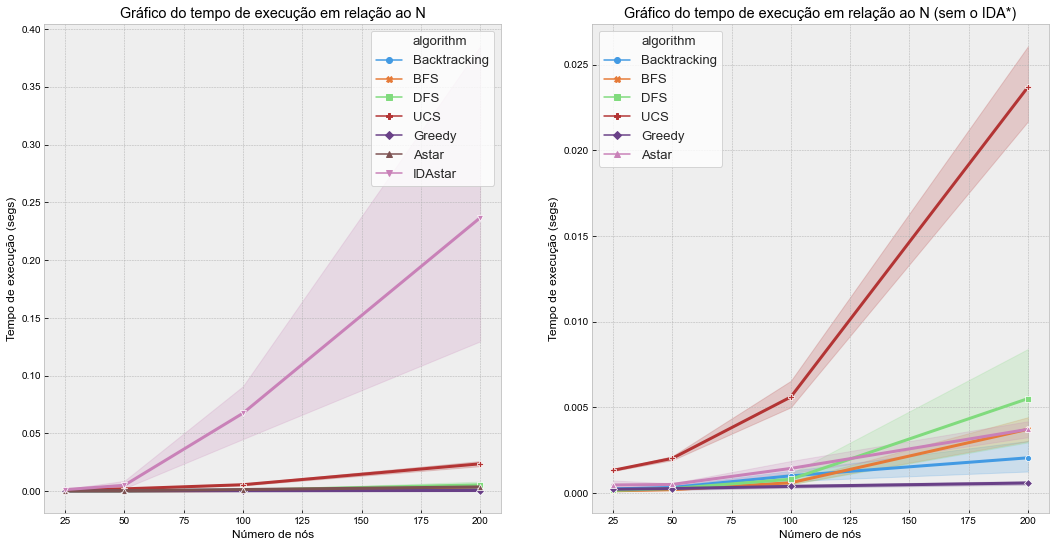

In [6]:
fig, axes = plt.subplots(1,2, figsize=(18, 9), sharex=True)

sns.set(font_scale=1.2, style="whitegrid")

axes[0].set_title('Gráfico do tempo de execução em relação ao N')

time_plot = sns.lineplot(
    x = " n",
    y = ' execution_time',
    data = output_df,
    hue = 'algorithm',
    lw=3, ax=axes[0],
    palette=algo_colors,
    style="algorithm",
    markers=True,
    dashes=False
)

axes[1].set_title('Gráfico do tempo de execução em relação ao N (sem o IDA*)')
time_plot = sns.lineplot(
    x = " n", 
    y = ' execution_time', 
    data = output_df.query("algorithm != 'IDAstar'"), 
    hue = 'algorithm', lw=3, ax=axes[1], 
    palette=algo_colors[:5] + [algo_colors[6]], 
    style="algorithm", 
    markers=True, 
    dashes=False
)

axes[0].set(xlabel="Número de nós", ylabel = "Tempo de execução (segs)")
axes[1].set(xlabel="Número de nós", ylabel = "Tempo de execução (segs)")

fig.savefig('./outputs/time_n_plot.png')

<font size=3>
    <p>
        O gráfico seguinte mostra o custo médio de cada algoritmo em relação ao número de nós. Podemos perceber que tanto o Backtracking quanto a busca em profundidade apresentam comportamento exponinencial enquanto os demais algoritmos apresentam um comportamento logarítmico.
    </p>
</font>

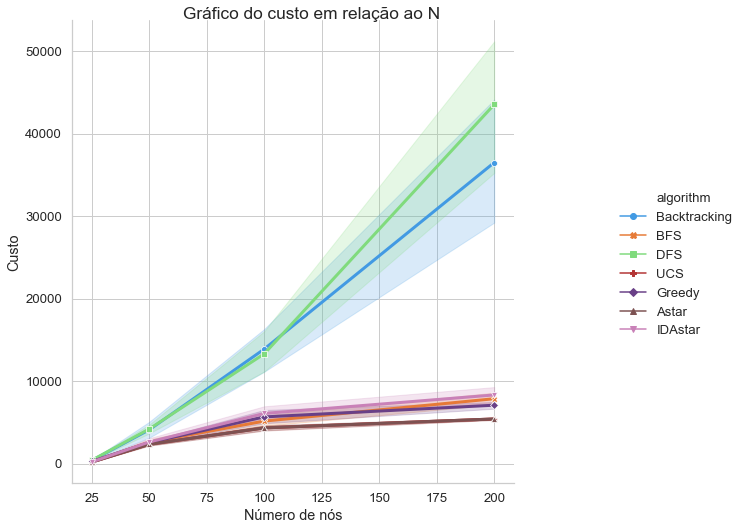

In [7]:
sns.set(font_scale=1.2, style="whitegrid")
cost_plot = sns.relplot(
    x = " n", 
    y = ' cost',
    data = output_df,
    hue = 'algorithm',
    kind = "line",
    lw=3,
    palette=algo_colors,
    style="algorithm",
    markers=True,
    dashes=False
)
cost_plot.set_axis_labels("Número de nós", "Custo")
cost_plot.fig.suptitle('Gráfico do custo em relação ao N')
cost_plot.fig.title_fontsize = 18
cost_plot.fig.set_size_inches((12,8))

cost_plot.savefig('./outputs/cost_n_plot.png')

<font size=3>
    <p>
        Como o algoritmo A* possui um custo médio semelhante ao da busca ordenada, onde o mesmo é escondido no gráfico. Por esse motivo foi criado um gráfico apenas para o A*, mostrando seu desempenho.
    </p>
</font>

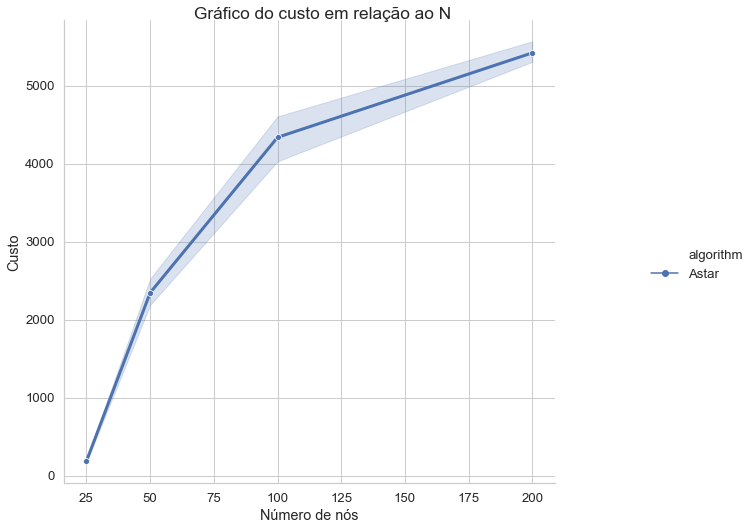

In [16]:
sns.set(font_scale=1.2, style="whitegrid")
aCost_plot = sns.relplot(
    x = " n",
    y = ' cost',
    data = output_df.query("algorithm == 'Astar'"),
    hue = 'algorithm',
    kind = "line",
    lw=3,
    style="algorithm",
    markers=True,
    dashes=False
)
aCost_plot.set_axis_labels("Número de nós", "Custo")
aCost_plot.fig.suptitle('Gráfico do custo em relação ao N')
aCost_plot.fig.title_fontsize = 18
aCost_plot.fig.set_size_inches((12,8))

aCost_plot.savefig('./outputs/aCost_n_plot.png')

<font size=3>
    <p>
        Os gráficos abaixo representam as mesmas informações que os gráficos anteriores e foram criados para melhor visualização.
    </p>
</font>

[Text(0, 0.5, 'Custo'), Text(0.5, 0, 'Algoritmo')]

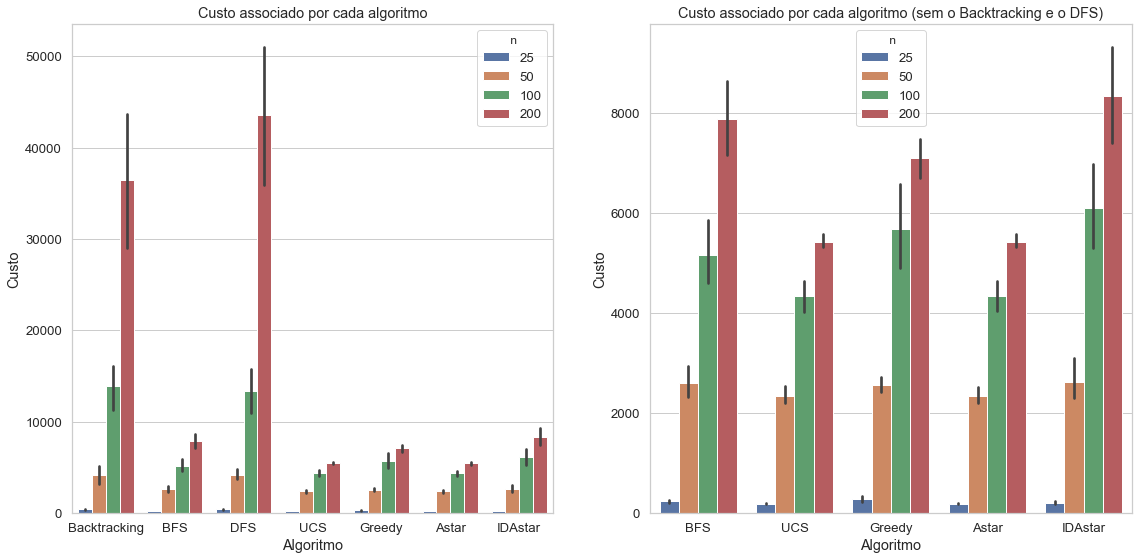

In [9]:
fig, axes = plt.subplots(1,2, figsize=(19, 9))

sns.set(font_scale=1.2, style="whitegrid")
cost_bar = sns.barplot(x = "algorithm", y = ' cost', hue=' n', data = output_df, ax=axes[0])
cost_bar.set_title("Custo associado por cada algoritmo")

cost_bar = sns.barplot(x = "algorithm", y = ' cost', hue=' n', data = output_df.query("algorithm != 'Backtracking' and algorithm != 'DFS'"), ax=axes[1])
cost_bar.set_title("Custo associado por cada algoritmo (sem o Backtracking e o DFS)")

axes[0].set(xlabel="Algoritmo", ylabel = "Custo")
axes[1].set(xlabel="Algoritmo", ylabel = "Custo")

<font size=3>
    <p>
        Agora nos gráficos seguintes temos a média de nós expandidos por cada algortimo. Foi criado um gráfico para cada tamanho de mapa para melhor visualização. Como mencionado antes, o número de nós expandidos pelo IDA* é muito maior pois são contados os nós expandidos de todas as sub-árvores geradas na sua execução. A quantidade de nós expandidos por ele é tão grande que o gráfico é distorcido, por isso nós limitamos o tamanho e escrevemos o valor da sua média nos dois últimos gráficos.
    </p>
    <p>
        O algoritmo de busca ordenada também expande mais nós por que ele tem a característica de só terminar a execução quando encontrar a solução com menor custo. Através desses gráficos vemos também que o algoritmo guloso teve o menor número de nós expandidos em todos os casos.
    </p>
</font>

<Figure size 432x288 with 0 Axes>

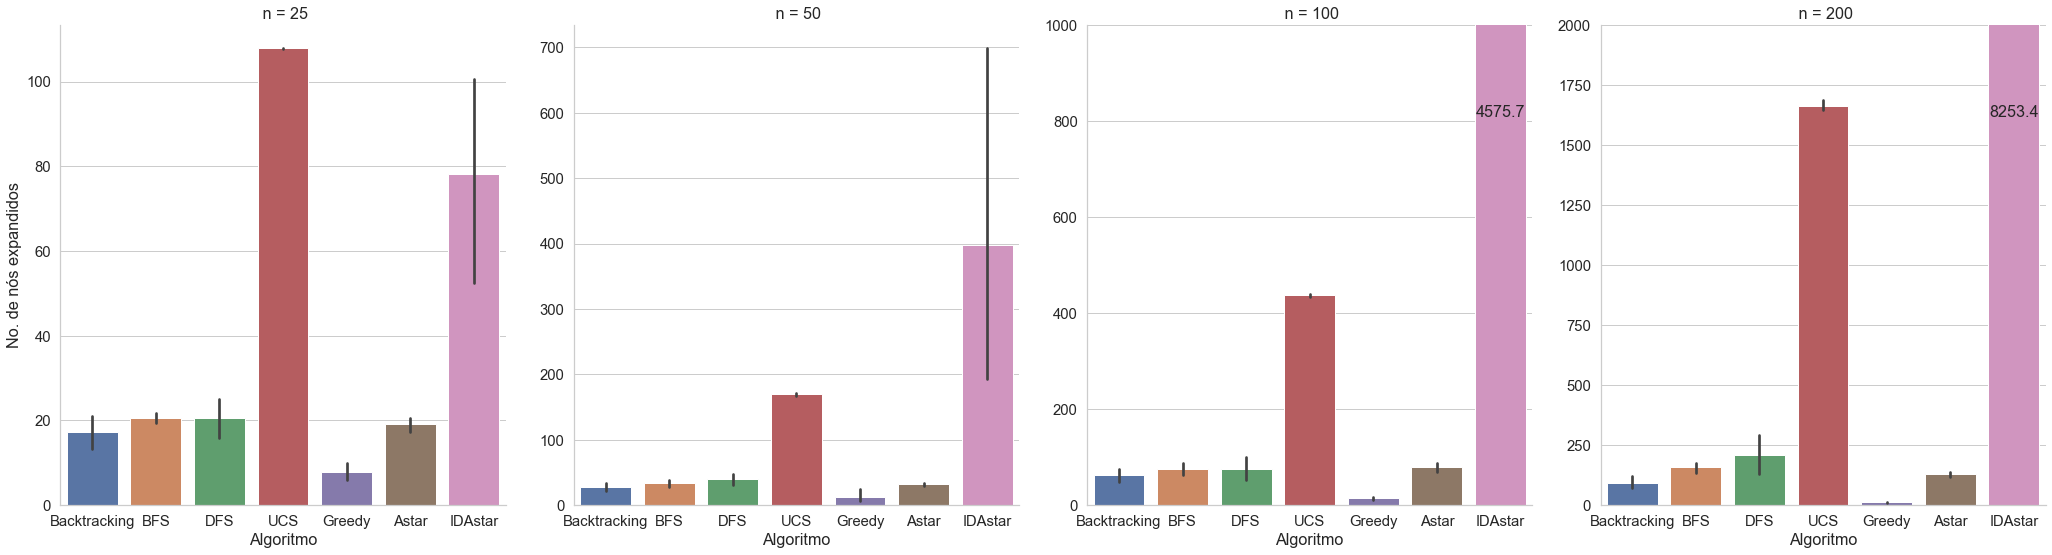

In [10]:
# fig, axes = plt.subplots(1,2, figsize=(16, 8))

# sns.set(font_scale=1.2)
# expd_nodes = sns.barplot(x = "algorithm", y = ' expanded_nodes', data = output_df, ax=axes[0])
# expd_nodes.set_title("Nós expandidos por cada algoritmo")

# expd_nodes = sns.barplot(x = "algorithm", y = ' expanded_nodes', data = output_df.query("algorithm != 'UCS' and algorithm != 'IDAstar'"), ax=axes[1])
# expd_nodes.set_title("Nós expandidos por cada algoritmo (sem a busca ordenada e o IDA*)")

# axes[0].set(xlabel="Algoritmo", ylabel = "No. de nós expandidos")
# axes[1].set(xlabel="Algoritmo", ylabel = "No. de nós expandidos")

# fig.savefig('./outputs/expanded_algo_plot.png')

fig = plt.figure()

sns.set(font_scale=1.35, style="whitegrid", rc={'figure.figsize':(12,8)})
visit_nodes = sns.catplot(x = "algorithm", y = ' expanded_nodes', kind='bar', data = output_df, col=' n', sharey=False, height=8, aspect=.9)

visit_nodes.axes[0][2].set_ylim(0, 1000)
visit_nodes.axes[0][3].set_ylim(0, 2000)

# visit_nodes.set_title("Nós visitados por cada algoritmo")

p = visit_nodes.axes[0][2].patches[-1]
visit_nodes.axes[0][2].annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., 800), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')

p = visit_nodes.axes[0][3].patches[-1]
visit_nodes.axes[0][3].annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2. , 1600), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')


visit_nodes.set_axis_labels("Algoritmo", "No. de nós expandidos")

visit_nodes.savefig('./outputs/visited_n_plot.png')

<font size=3>
    <p>
       De forma similar ao gráfico anterior nós temos abaixo os gráficos do número de nós visitados por cada algoritmo, separados por número de nós. Podemos perceber que o padrão se repete como nos nós expandidos para o IDA*, já que também consideramos o número de nós visitados de todas as sub-árvores geradas por ele. É interessante notar que o comportamento da busca ordenada em relação aos nós visitados não se assemelha com os dos gráficos anteriores.
    </p>
    <p>
       O algoritmo guloso também obteve o menor número de nós visitados em todos os casos.
    </p>
</font>

<Figure size 864x576 with 0 Axes>

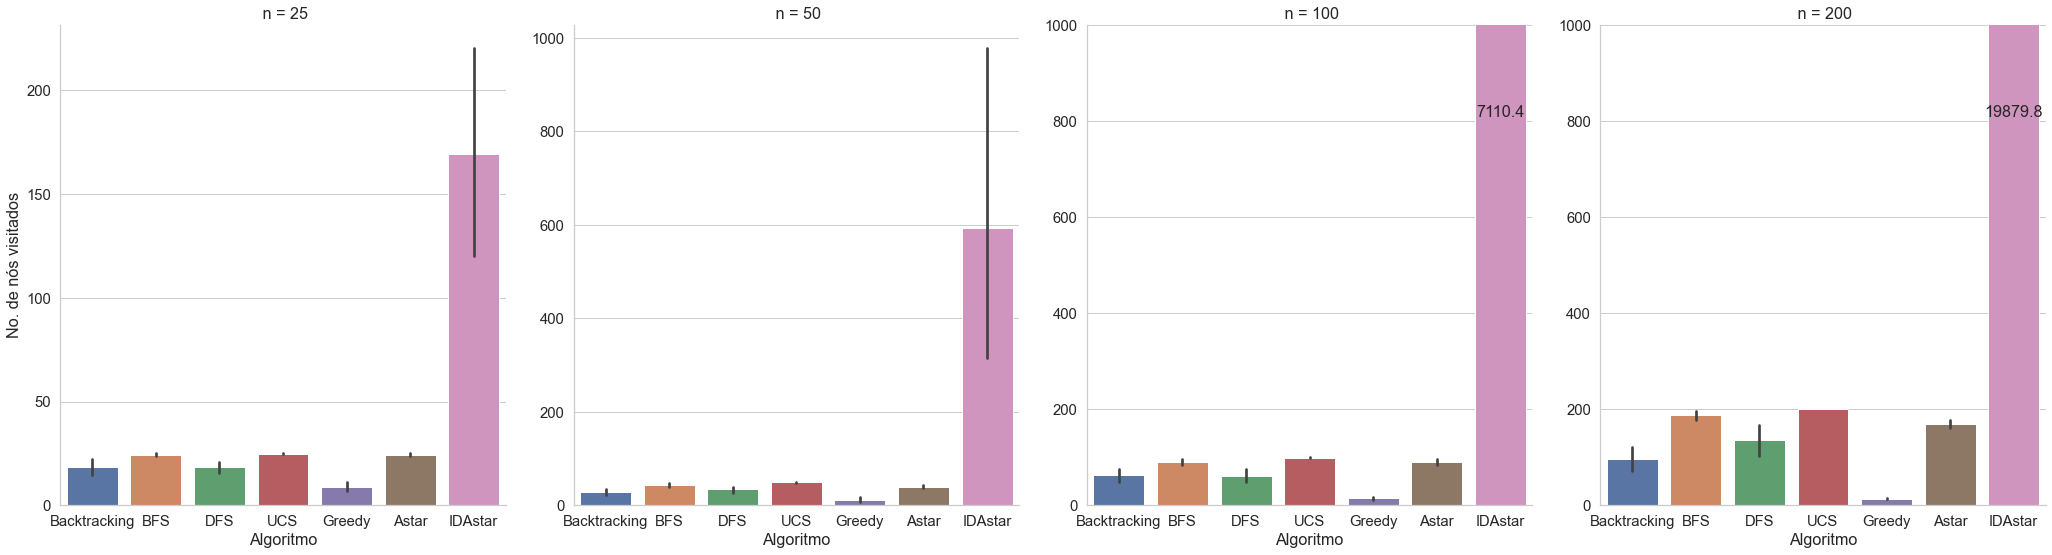

In [11]:
fig = plt.figure()

sns.set(font_scale=1.35, style="whitegrid", rc={'figure.figsize':(12,8)})
visit_nodes = sns.catplot(x = "algorithm", y = ' visited_nodes', kind='bar', data = output_df, col=' n', sharey=False, height=8, aspect=.9)

visit_nodes.axes[0][2].set_ylim(0, 1000)
visit_nodes.axes[0][3].set_ylim(0, 1000)

# visit_nodes.set_title("Nós visitados por cada algoritmo")

p = visit_nodes.axes[0][2].patches[-1]
visit_nodes.axes[0][2].annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., 800), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')

p = visit_nodes.axes[0][3].patches[-1]
visit_nodes.axes[0][3].annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2. , 800), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')


visit_nodes.set_axis_labels("Algoritmo", "No. de nós visitados")

visit_nodes.savefig('./outputs/visited_n_plot.png')


<font size=3>
    <p>
       No gráfico seguinte temos a média da profundidade alcançada por cada algoritmo. De forma previsível notamos que o algoritmo de Busca em Profundidade possui a maior média.
    </p>
    <p>
       É interessante notar que a segunda maior média está associada ao Backtracking. Isto se deve provavelmente ao seu comportamento de tentativa e erro na busca pelo nó de destino. Por causa dos intervalos de confiança do Backtracking e da Busca em Profundidade estarem englobando as médias um do outro nos casos com tamanhos de mapas de 50, 100 e 200 nós, podemos afirmar com 95% de confiança que eles são semelhantes nesses casos.
    </p>
</font>

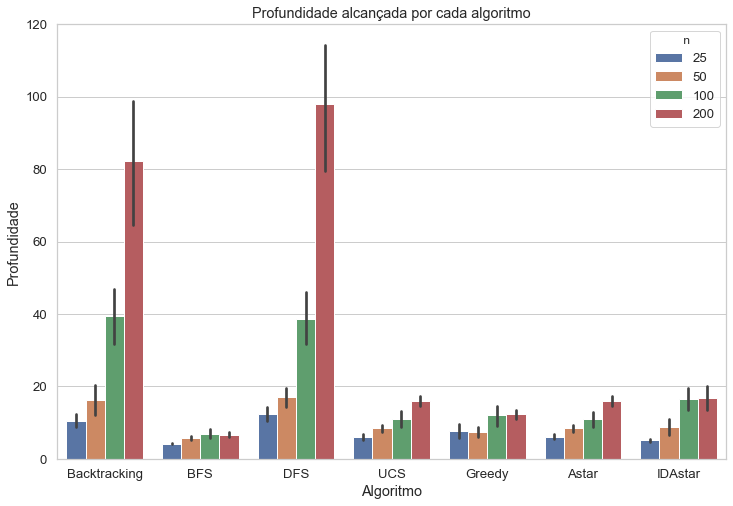

In [12]:
fig = plt.figure()

sns.set(font_scale=1.2, style="whitegrid", rc={'figure.figsize':(12,8)})
depth_mean = sns.barplot(x = "algorithm", y = ' depth', data = output_df, hue=' n')
depth_mean.set_title("Profundidade alcançada por cada algoritmo")

depth_mean.set(xlabel="Algoritmo", ylabel = "Profundidade")

fig.savefig('./outputs/depth_algo_plot.png')

<font size=3>
    <p>
       Agora abaixo temos o gráfico do fator de ramificação médio de cada algoritmo agrupados por número de nós no mapa. Podemos interpretar o fator ramificação médio como sendo a média do número de filhos que cada nó da árvore de busca de um algoritmo tem.
    </p>
    <p>
       Podemos observar que, em tamanhos de mapa com 25 nós, o Backtracking possui uma ramificação maior. Conforme o número de nós aumenta, a busca ordenada tomo lugar tendo o maior fator de ramificação médio. É fácil observar também que o algortimo com menor fator de ramificação médio é a Busca em Largura.
    </p>
</font>

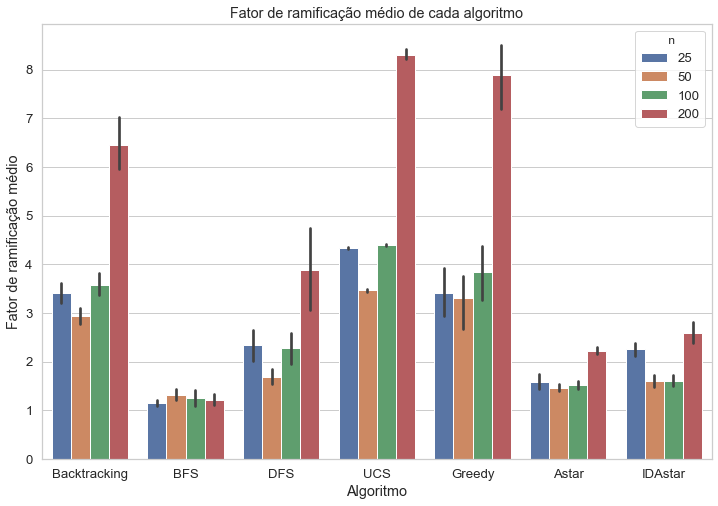

In [13]:
fig = plt.figure()

sns.set(font_scale=1.2, style="whitegrid", rc={'figure.figsize':(16,12)})
avgBrch_mean = sns.barplot(x = "algorithm", y = ' average_branching_factor', data = output_df, hue = ' n')
avgBrch_mean.set_title("Fator de ramificação médio de cada algoritmo")
avgBrch_mean.set(xlabel="Algoritmo", ylabel = "Fator de ramificação médio")

fig.savefig('./outputs/avgBranch_algo_plot.png')

In [14]:
cost_matrix = algo_n_group[['algorithm', ' n', ' cost']]
cost_matrix = cost_matrix.pivot(index='algorithm', columns=' n', values= ' cost')
cost_matrix = cost_matrix / 1000

<font size=3>
    <p>
       Como forma de melhor visualização do dados obtidos, foi feito um mapa de calor dos custos de cada algoritmo em relação ao tamanho do mapa gerado. Como já foi observado, os algoritmos que possuem o maior custo médio são a busca em profundidade e o Backtracking. Podemos ver aqui também que a maioria do algortimos tem aumento de custo suave em relação ao tamanho do mapa, com exceção do dois algoritmos mencionados anteriormente.
    </p>
    <p>
       Neste mapa de calor também podemos ver que a média de custo do A* e da busca ordenada são exatamente iguais. Isto provavelemente acontece pois, quando uma heurística consistente é aplicada, o algoritmo A* sempre vai encontrar a solução ótima, que no caso é a solução da busca ordenada. O nosso gerador de mapas foi implementado de forma que a consistência da heurística sempre seja garantida, gerando então o resultado mostrado abaixo.
    </p>
</font>

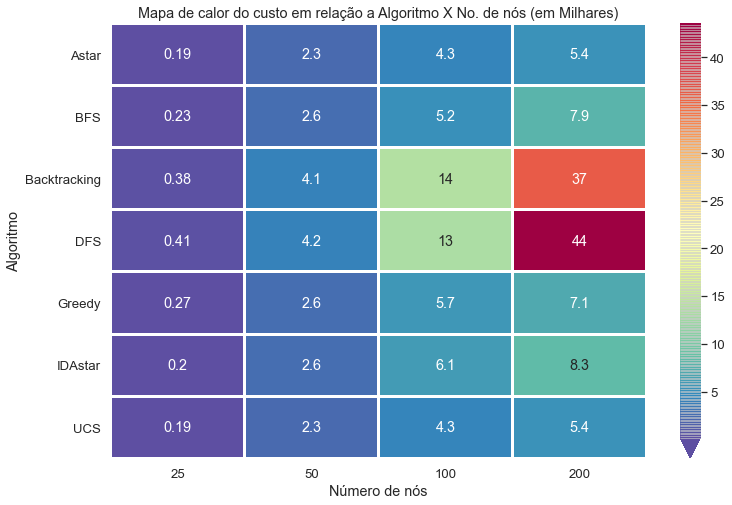

In [15]:
fig = plt.figure(figsize=(12,8))

cbar_kws = {
            "shrink":1,
            'extend':'min', 
            "drawedges":True,
           }

heat_map = sns.heatmap(cost_matrix, cmap='Spectral_r', linewidths=2, cbar_kws=cbar_kws, annot=True)

plt.title("Mapa de calor do custo em relação a Algoritmo X No. de nós (em Milhares)")
heat_map.set(xlabel="Número de nós", ylabel = "Algoritmo")

fig.savefig('./outputs/heatmap.png')

## Conclusão

<font size=3>
    <p>
      Podemos analisar através dessas comparações que cada algoritmo possui as suas próprias caracterísicas e, consequentemente, seus próprios desempenhos. Fica a critério do programador escolher o algortimo que melhor se encaixa nos requisitos do seu problema. Vale a pena ressaltar que as condições criadas para avaliação dos algoritmos foram geradas artificialmente, fazendo com que os resultados observados neste relatório não reflitam em condições mais rigídas e/ou específicas.
    </p>
    <p>
       É também importante notar que o algoritmo A* obteve resultados satisfatórios em todas as métricas avaliadas, de modo que é perceptível o fato dele ser o principal algoritmo escolhido para descoberta de caminhos entre pontos.
    </p>
</font>